# Project: Analysing the Fertility Rate and the Effect of Income on the Fertility Rate

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I selected the Gapminder Data as source of my data sets. One can find the original data here: https://www.gapminder.org/data/. I choose to analyse the effect of income per capita on the fertility rate of countries since the year 1800. Hence I downloaded the data for population growth as a dependent variable. 
<li> children_per_woman_total_fertility </li>

I choose income as independent variables with possible effects on the fertility rate: 
<li> income_per_person_gdppercapita_ppp_inflation_adjusted </li> 

Questions to answer: 
<li> Which of the independent variables shows the strongest correlation with the fertility rate?  </li> 


In [47]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# using a variable to number the depicted plots
plot = 1
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [48]:
df_fert = pd.read_csv('children_per_woman_total_fertility.csv', index_col = 0)
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv', index_col = 0)

#### Data inspection

##### Fertlity

In [49]:
df_fert.isna().sum().sum()

87

In [50]:
df_fert

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,2.10,2.09,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02
Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,1.68,1.68,1.69,1.69,1.69,1.69,1.70,1.70,1.70,1.70
South Africa,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80


The fertility data is provided from the year 1800 to the year 2100. There is data for 202 countries. There are 87 missing data points ("na"- data) in the fertility data.  

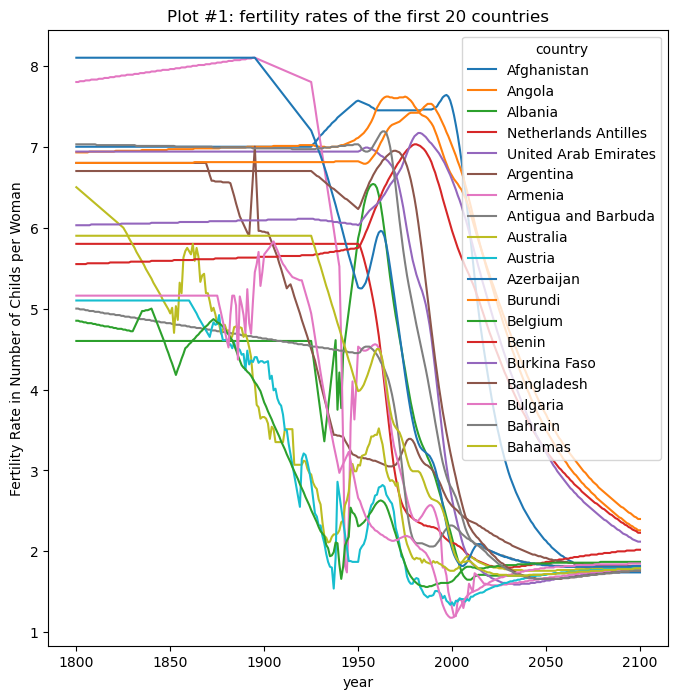

In [51]:
# Plotting the first 20 countreis
df_fert.iloc[1:20,:].transpose().plot(legend= True, figsize = (8,8), \
                                title='Plot #'+str(plot)+': fertility rates of the first 20 countries', \
                                ylabel = 'Fertility Rate in Number of Childs per Woman', xlabel = 'year');
plot+=1  

We can see that the fertility data has high fluctuations. Hence, we want to use a moving average to get rid of the messy outlook. 

##### Income

In [52]:
df_income.isna().sum().sum()

0

In [53]:
df_income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
Angola,618,620,623,626,628,631,634,637,640,642,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310
Albania,667,667,667,667,667,668,668,668,668,668,...,19.4k,19.8k,20.2k,20.6k,21k,21.5k,21.9k,22.3k,22.8k,23.3k
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73.6k,75.1k,76.7k,78.3k,79.8k,81.5k,83.1k,84.8k,86.5k,88.3k
United Arab Emirates,998,1000,1010,1010,1010,1020,1020,1020,1030,1030,...,66.8k,68.1k,69.4k,70.8k,72.2k,73.7k,75.2k,76.7k,78.3k,79.9k


In [54]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 241 entries, 1800 to 2040
dtypes: int64(85), object(156)
memory usage: 368.7+ KB


The income data is provided from the year 1800 to the year 2040. There is data for 195 countries. There are no missing data ("na" data) in the income data. The income data is provide  in a format, where the letter "k" is used to represent a multiple of 1,000. For further calculations, the letter has to be replaced with a machine readable number. 

In [55]:
# Getting only machine readable number without any letters in the income data
# Replacing the letter k with 1,000 (10**3) in the income data for forther calculations
for x in df_income:
    # Get all numbers as float: Delete the letter k in every data point and change the type to float
    df_income[x] = (df_income[x].replace(r'[k]', '', regex=True).astype(float)* \
                    
    # Replace all occurences of "k" with 10**3 and multiply it with the float number 
        df_income[x].astype(str).str.extract(r'[\d\.]+([k]+)', expand=False).fillna(1).replace(r'k', 10**3).astype(int) )

df_income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,2550.0,2600.0,2660.0,2710.0,2770.0,2820.0,2880.0,2940.0,3000.0,3060.0
Angola,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,640.0,642.0,...,6110.0,6230.0,6350.0,6480.0,6610.0,6750.0,6880.0,7020.0,7170.0,7310.0
Albania,667.0,667.0,667.0,667.0,667.0,668.0,668.0,668.0,668.0,668.0,...,19400.0,19800.0,20200.0,20600.0,21000.0,21500.0,21900.0,22300.0,22800.0,23300.0
Andorra,1200.0,1200.0,1200.0,1200.0,1210.0,1210.0,1210.0,1210.0,1220.0,1220.0,...,73600.0,75100.0,76700.0,78300.0,79800.0,81500.0,83100.0,84800.0,86500.0,88300.0
United Arab Emirates,998.0,1000.0,1010.0,1010.0,1010.0,1020.0,1020.0,1020.0,1030.0,1030.0,...,66800.0,68100.0,69400.0,70800.0,72200.0,73700.0,75200.0,76700.0,78300.0,79900.0


All income data is now machine readable

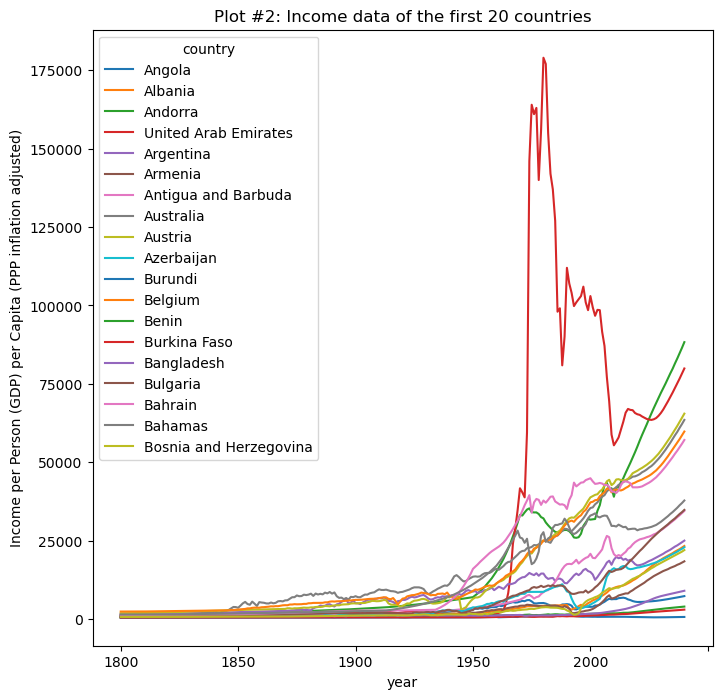

In [56]:
# Plotting the first 20 countreis
df_income.iloc[1:20,:].transpose().plot(legend= True, figsize = (8,8), 
                                title='Plot #'+str(plot)+': Income data of the first 20 countries', 
                                ylabel = 'Income per Person (GDP) per Capita (PPP inflation adjusted)', xlabel = 'year');
plot+=1  

Like in the fertility data we can also see high fluctuations in the income data. Hence, we also want to use a moving average to get rid of the yearly fluctuations. 


### Data Cleaning 

#### Cleaning fertility data

After data inspection,we have to do cleaning steps. The fertility data is given as historical as well as projected data. For the analysis we are not interested in projected data, therefore projected data is dropped. Furthermore, we saw in data inspection that the fertility data has high fluctation. Hence, I use a moving average to level out most fluctation and gain a better overview. 


In [57]:
# Using only Data up to today for analysis (year 1800 to 2021), because we do not analyse the projected data 
df_fert.drop(labels=df_fert.loc[:,'2022':'2100'].columns, axis=1,inplace=True)

In [58]:
# Calculating the 20 year moving average
df_fert_20_year_mean = df_fert.transpose().rolling(20).mean()

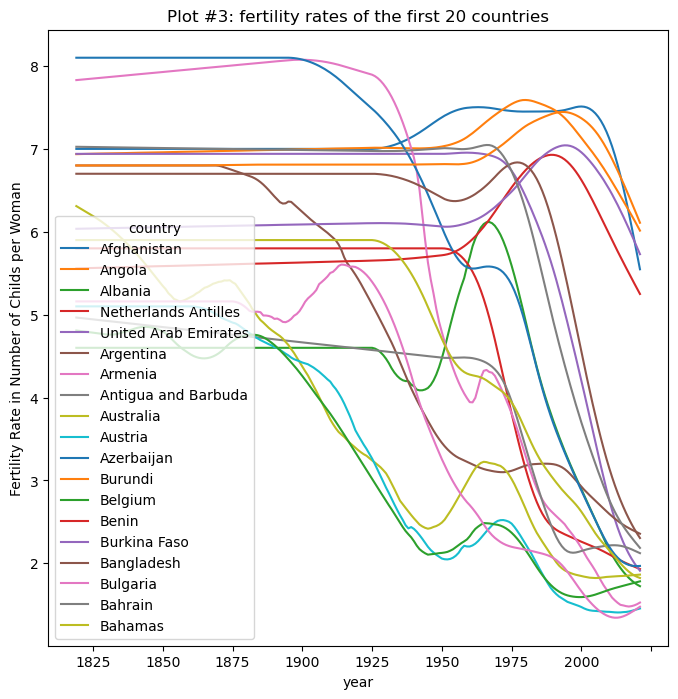

In [59]:
# Plotting the first 20 countries
df_fert_20_year_mean.iloc[:,1:20].plot(legend= True, figsize = (8,8), \
                                title='Plot #'+str(plot)+': fertility rates of the first 20 countries', \
                                ylabel = 'Fertility Rate in Number of Childs per Woman', xlabel = 'year');
plot+=1  

The plotting of the first 20 countries shows, that the 20 year moving average looks better for analysing trends, because the fluctations are reduced and an overall trend is comprehensible. 

#### Cleaning income data

Likewise to the fertility data, I get rid of all projected data of the income data set. Furthermore, I also use a moving average to reduce yearly fluctations. 

In [60]:
# Using only Data up to today for analysis (year 1800 to 2021), because we do not analyse the projected data 
df_income.drop(labels=df_income.loc[:,'2022':'2040'].columns, axis=1, inplace=True)

In [61]:
# Calculating the 20 year moving average
df_income_20_year_mean = df_income.transpose().rolling(20).mean()

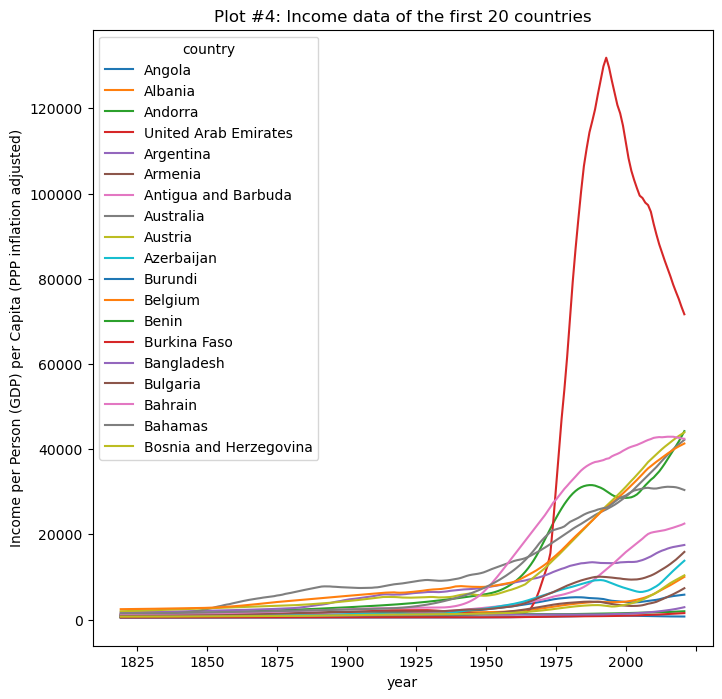

In [62]:
# Plotting the first 20 countreis
df_income_20_year_mean.iloc[:,1:20].plot(legend= True, figsize = (8,8), \
                                title='Plot #'+str(plot)+': Income data of the first 20 countries', \
                                ylabel = 'Income per Person (GDP) per Capita (PPP inflation adjusted)', xlabel = 'year');
plot+=1

After plotting the data of the first 20 countires, one can see that the 20 year moving average of the income data also looks better for analysing trends.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which countries have currently the lowest / highest fertility (top five countries)? 

In [63]:
# Analyse the Data of the top five countries with the lowest / highest fertility rate for the year 2021
print('The five countries with the highest fertility rates:')
print(df_fert['2021'].nlargest(5))

print('\nThe five countries with the lowest fertility rates:')
print(df_fert['2021'].nsmallest(5))

# Store the data of the top five countries for further calculations
fert_high = df_fert['2021'].nlargest(5)
fert_low = df_fert['2021'].nsmallest(5)

The five countries with the highest fertility rates:
country
Niger               6.93
Somalia             5.80
Congo, Dem. Rep.    5.62
Mali                5.60
Chad                5.45
Name: 2021, dtype: float64

The five countries with the lowest fertility rates:
country
Moldova      1.23
Portugal     1.24
Taiwan       1.27
Singapore    1.28
Poland       1.29
Name: 2021, dtype: float64


The fertility rates differ greatly between the countries with the highest and lowest fertility rates. The fertility rate of Niger, the country with the highest fertility rate in 2021 with 6.93 childs per woman, is about 5.6 times higher than the fertility rate in Moldova, the country with the lowest fertility rate at 1.23 childs per woman. 

The countries with the lowest fertility rate do not reach a level at which the population is stable (at about 2.1 childs per woman, source OECD, see link below), but the population size of these countires will decrease (not including the factor of migration). The countries with the highest fertility rates will see a increase of their population size (also not including migration).

The top five countries (highest/lowest fertility rates) will be used for further examinations and calculations, because it is most likely that they offer the most intresting insights. 

Link to source OECD on fertility rate: https://data.oecd.org/pop/fertility-rates.htm#:~:text=Assuming%20no%20net%20migration%20and,ensures%20a%20broadly%20stable%20population.

### Research Question 2: How much (in percent) did the fertility rate change from the year 1800 to today (year 2021) for the top five countries (highest/lowest fertility)?

#### Top five countries (highest fertility)

In [64]:
# Create a dataframe with the data from 1800 and 2021 for the top five countries (highest)
df_fert_high = df_fert.loc[fert_high.index,'1800'].to_frame().join(fert_high)

# Calculate the absolute difference in fertility rates between 1800 and 2021
df_fert_high = df_fert_high.join((df_fert_high['2021'] - df_fert_high['1800']).rename('diff_abs'))

# Calculate the relative difference in fertility rates between 1800 and 2021
df_fert_high = df_fert_high.join((df_fert_high['2021'] / df_fert_high['1800']).rename('diff_rel'))

# Display resulting dataframe
df_fert_high

,1800,2021,diff_abs,diff_rel
country,,,,
Niger,6.83,6.93,0.10,1.014641
Somalia,6.87,5.80,-1.07,0.844250
"Congo, Dem. Rep.",5.99,5.62,-0.37,0.938230
Mali,6.23,5.60,-0.63,0.898876
Chad,6.06,5.45,-0.61,0.899340


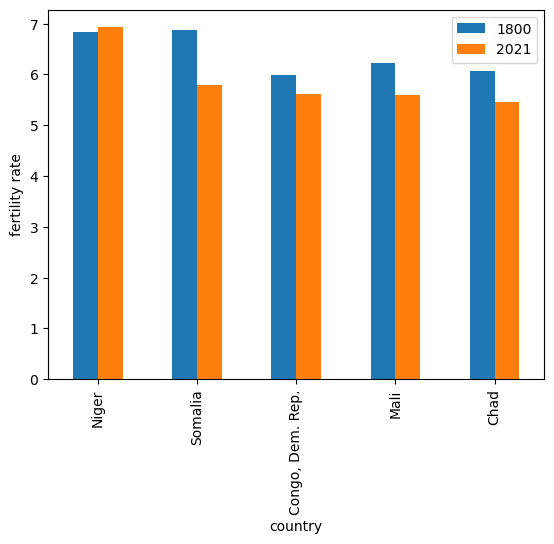

In [65]:
# Plot data to visualize the effect of difference in fertility rate over time
df_fert_high[['1800', '2021']].plot.bar(ylabel='fertility rate');

We see different trends when comparing the fertility rates in 1800 and 2021. Niger shows an increase in the fertility rate from 1800 to 2021, while all other countries show a slight decrease. The decrease amounts to between 84 % and 93 % for the other four countries. 

In order to investigate this further and check for trends in the timeline, we need a plot of the fertility rate of the countries (see below in the next question). 

#### Top five countries (lowest fertility)

In [66]:
# Create a dataframe with the data from 1800 and 2021 for the top five countries (highest)
df_fert_low = df_fert.loc[fert_low.index,'1800'].to_frame().join(fert_low)

# Calculate the absolute difference in fertility rates between 1800 and 2021
df_fert_low = df_fert_low.join((df_fert_low['2021'] - df_fert_low['1800']).rename('diff_abs'))

# Calculate the relative difference in fertility rates between 1800 and 2021
df_fert_low = df_fert_low.join((df_fert_low['2021'] / df_fert_low['1800']).rename('diff_rel'))

# Display resulting dataframe
df_fert_low

,1800,2021,diff_abs,diff_rel
country,,,,
Moldova,6.39,1.23,-5.16,0.192488
Portugal,4.50,1.24,-3.26,0.275556
Taiwan,5.83,1.27,-4.56,0.217839
Singapore,5.47,1.28,-4.19,0.234004
Poland,6.28,1.29,-4.99,0.205414


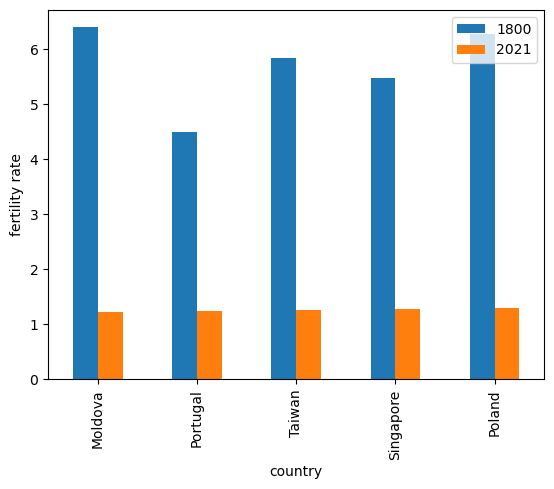

In [67]:
# Plot data to visualize the effect of difference in fertility rate over time
df_fert_low[['1800', '2021']].plot.bar(ylabel='fertility rate');

For the countries with the lowest fertility rates, we see a uniform trend. The fertility rates decreased in all countries, when comparing the rates in 1800 and 2021. The fertility rates in 2021 fell to a level of 19 % to 27 % of the rates in 1800. Portugal exibits the smallest overall decrease. This is due to the fact, that Portugal already started from a smaller level than the other countries. 

In order to check for trends we also plot the fertility rates over time.

### Research Question 3: Can we observe any trends in the fertility data?

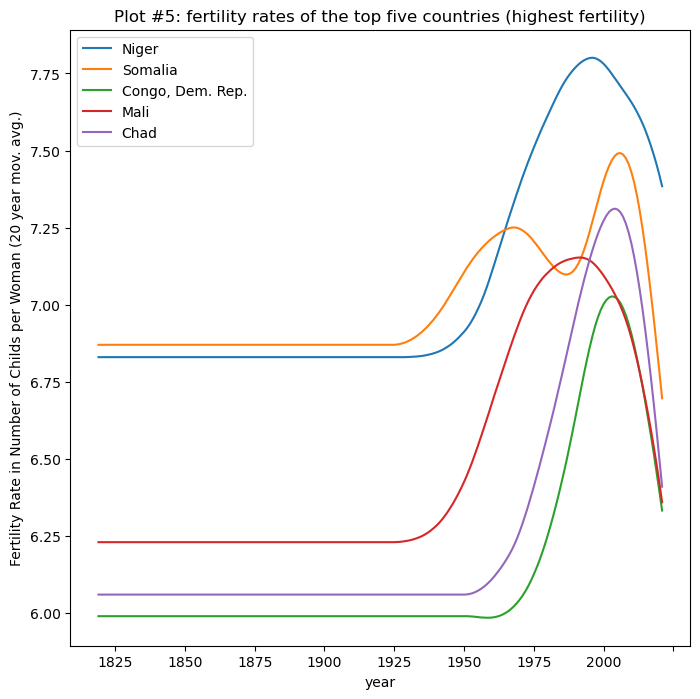

In [68]:
# Plotting the fertility rate for the top five countries (highest fertility rate)
for country in df_fert_high.index:
    df_fert_20_year_mean.loc[:,country].plot(legend= True, figsize = (8,8), \
                                title='Plot #'+str(plot)+': fertility rates of the top five countries (highest fertility)', \
                                ylabel = 'Fertility Rate in Number of Childs per Woman (20 year mov. avg.)', xlabel = 'year')
plot+=1  

We can observe three different trends. 

(1) The fertility rate is constant for over 100 years. That is probably due to only scarce available data. Hence, we have to be careful with all findings we base on data before 1950. All countries with the highest fertility rate are located in Sub-Sahara-Africa. Before 1950 data like the fertility probably was not collected in this Region.

(2) The fertility rate rises between aprox. the years 1950 and 2000. 

(3) The fertility rate decreases aprox. after the year 2000.


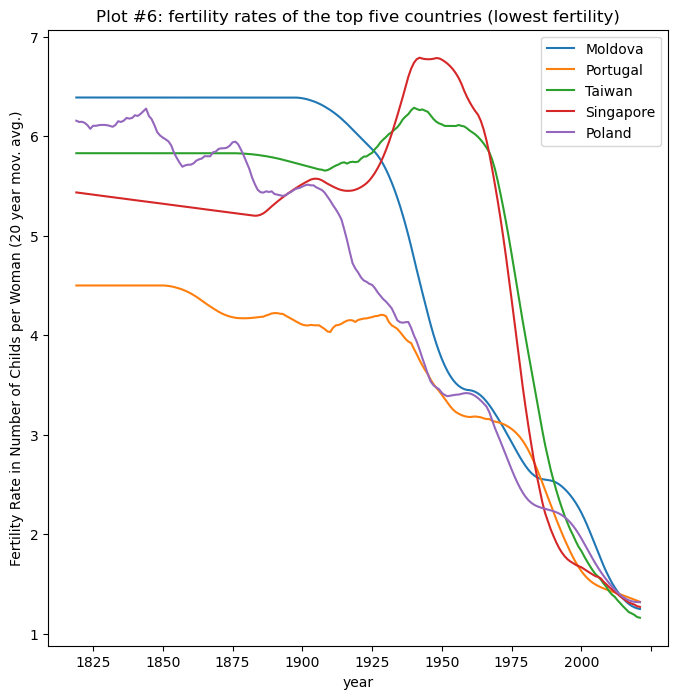

In [69]:
# Plotting the fertility rate (20 year mov avg) for the top five countries (highest fertility rate)
for country in df_fert_low.index:
    df_fert_20_year_mean.loc[:,country].plot(legend= True, figsize = (8,8), \
                                title='Plot #'+str(plot)+': fertility rates of the top five countries (lowest fertility)', \
                                ylabel = 'Fertility Rate in Number of Childs per Woman (20 year mov. avg.)', xlabel = 'year')
plot+=1    

We can observe two types of patterns. 

(1) For Taiwan and Singapore the trends seem to be quite comparable to the high fertility countries. First, the fertility rate is at a level around 5 to 6 childs per woman, then increasing to over 6 and even 7 childs per woman around 1950. Afterwards, we see a steep decline, which results in the recent low rates at about 1.3 childs per woman. 

(2) The trends of the other countries differ from Taiwan and Singapore. They do not exhibit the same increase in fertility at around 1950, but see a steady decline in fertility from 1800 to today. The rate is also expected to slightly increase again. 


### Research Question 4: Did the difference between the top five countries with lowest and highest fertility change over time? 

In [70]:
# Calculate the mean values of the fertility rate in 1800 for comparison 
print('Mean value of the fertility rate in 1800 for the countries with the highest fertility rates:')
high_mean_1800 = df_fert_high['1800'].mean()
print(high_mean_1800)
print('Mean value of the fertility rate in 1800 for the countries with the lowest fertility rates:')
low_mean_1800 = df_fert_low['1800'].mean()
print(low_mean_1800) 
print('Difference in fertility rates in 1800 between countries with the highest and lowest fertility rate')
print(high_mean_1800 - low_mean_1800)

Mean value of the fertility rate in 1800 for the countries with the highest fertility rates:
6.395999999999999
Mean value of the fertility rate in 1800 for the countries with the lowest fertility rates:
5.694
Difference in fertility rates in 1800 between countries with the highest and lowest fertility rate
0.7019999999999991


In [71]:
# Calculate the mean value of the fertility rate in 2021 for comparison 
print('Mean value of the fertility rate in 2021 for the countries with the highest fertility rates:')
high_mean_2021 = df_fert_high['2021'].mean()
print(high_mean_2021)
print('Mean value of the fertility rate in 2021 for the countries with the lowest fertility rates:')
low_mean_2021 = df_fert_low['2021'].mean()
print(low_mean_2021) # Excepting Portugal from Calculation
print('Difference in fertility rates in 2021 between countries with the highest and lowest fertility rate')
print(high_mean_2021 - low_mean_2021)

Mean value of the fertility rate in 2021 for the countries with the highest fertility rates:
5.880000000000001
Mean value of the fertility rate in 2021 for the countries with the lowest fertility rates:
1.262
Difference in fertility rates in 2021 between countries with the highest and lowest fertility rate
4.618


When comparing the mean fertility rates for the countries with the lowest and highest rates, one can onserve that there is a much smaller difference in fertility rates in the year 1800 (0.7 childs per woman) than in the year 2021 (4.6 childs per woman).

Therefore, it seems intresting to analyse further which factors might explain the difference between the countries an especially which factors might explain the difference. We decided to analyse the effect of income and schooling years on the fertility rate

### Research Question 5: Which effect does the income per capita have on the fertility rate for the top five countries with the highest and lowest fertility?

#### Analysing the trends in income per capita for the low and high fertility countries

I decided to focus on the top five countries (high/low fertility). Hence, I create a Dataframe for the income data with only the top five countries (high/low)

In [72]:
# Slicing the data for the top five countries from the orignal DataFrame
df_income_fert_high = df_income.loc[fert_high.index].mean().to_frame()
df_income_fert_high.columns = ['h_fert_countries']
df_income_fert_low = df_income.loc[fert_low.index].mean().to_frame()
df_income_fert_low.columns = ['l_fert_countries']

# Joinung the data of the high and low top five countries
df_income_fert_high_low = df_income_fert_high.join(df_income_fert_low)

# In order to account for yearly fluctions in income, we also use the 20 year moving average
df_income_20_year_mean = df_income_fert_high_low.rolling(20).mean().dropna()

# Display the results
df_income_20_year_mean 

,h_fert_countries,l_fert_countries
1819,534.59,1037.29
1820,535.16,1037.49
1821,535.80,1038.44
1822,536.48,1039.73
1823,537.20,1040.55
...,...,...
2017,1094.36,30212.00
2018,1109.75,31084.50
2019,1126.58,31934.20
2020,1146.47,32747.90


For analysis we need a plot of the data as well as a statistical description. 

       h_fert_countries  l_fert_countries
count        203.000000        203.000000
mean         820.238867       5639.451379
std          249.499478       7771.719731
min          534.590000       1037.290000
25%          604.010000       1281.240000
50%          707.610000       2135.300000
75%         1035.690000       4817.250000
max         1295.010000      33613.500000


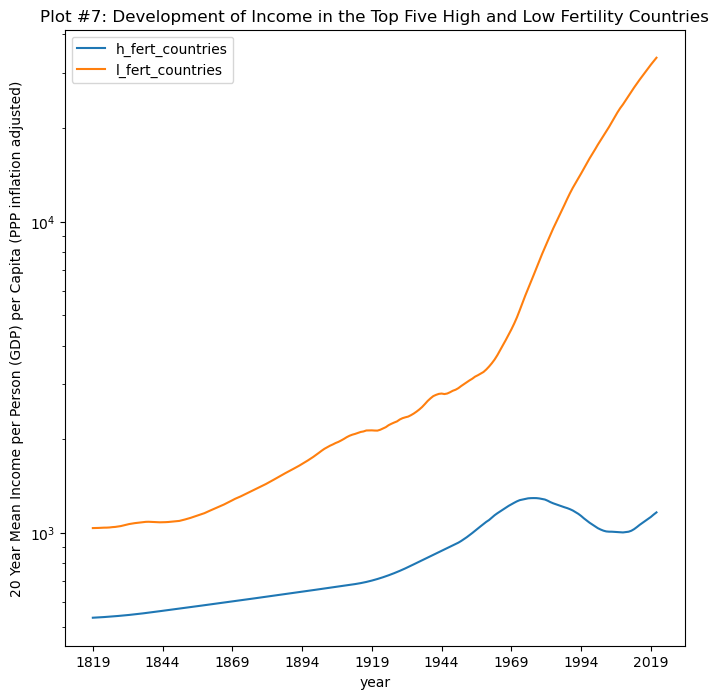

In [73]:
# Plotting  
print(df_income_20_year_mean.describe())
df_income_20_year_mean.plot(legend= True, figsize = (8,8), \
                                title='Plot #'+str(plot)+': Development of Income in the Top Five High and Low Fertility Countries', \
                                ylabel = '20 Year Mean Income per Person (GDP) per Capita (PPP inflation adjusted)', xlabel = 'year',
                                logy = True);
plot+=1  

We can observe that the income per capita of the low fertility countries start in the year 1800 from a level which is almost twice as high as the income of the high fertility countries (535 vs. 1,037 income per person). 
From the year 1800 to the year 1975 the income of both rises. After the year 1975 the income in the low fertility countries rises at an even higher rate. Whereas the income of the high fertility countries drops until the year 2000, when it rises again. 

#### Calculating the mean fertility data for the top five countries

For the comparison of income and fertility we need the mean fertility data for the low and high fertility countries

In [74]:
# Slicing the data for the top five countries from the orignal DataFrame
df_fert_high = df_fert.loc[fert_high.index].mean().to_frame()
df_fert_high.columns = ['h_fert_countries']
df_fert_low = df_fert.loc[fert_low.index].mean().to_frame()
df_fert_low.columns = ['l_fert_countries']

# Joinung the data of the high and low top five countries
df_fert_high_low = df_fert_high.join(df_fert_low)

# In order to account for yearly fluctions in income, we also use the 20 year moving average
df_fert_20_year_mean = df_fert_high_low.rolling(20).mean().dropna()

# Display the results
df_fert_20_year_mean 

,h_fert_countries,l_fert_countries
1819,6.3960,5.6624
1820,6.3960,5.6592
1821,6.3960,5.6588
1822,6.3960,5.6559
1823,6.3960,5.6505
...,...,...
2017,6.8966,1.3051
2018,6.8362,1.2924
2019,6.7726,1.2808
2020,6.7061,1.2683


       h_fert_countries  l_fert_countries
count        203.000000        203.000000
mean           6.593302          4.512771
std            0.302895          1.437147
min            6.396000          1.262100
25%            6.396000          3.997550
50%            6.396000          5.209500
75%            6.753800          5.514200
max            7.320700          5.668400


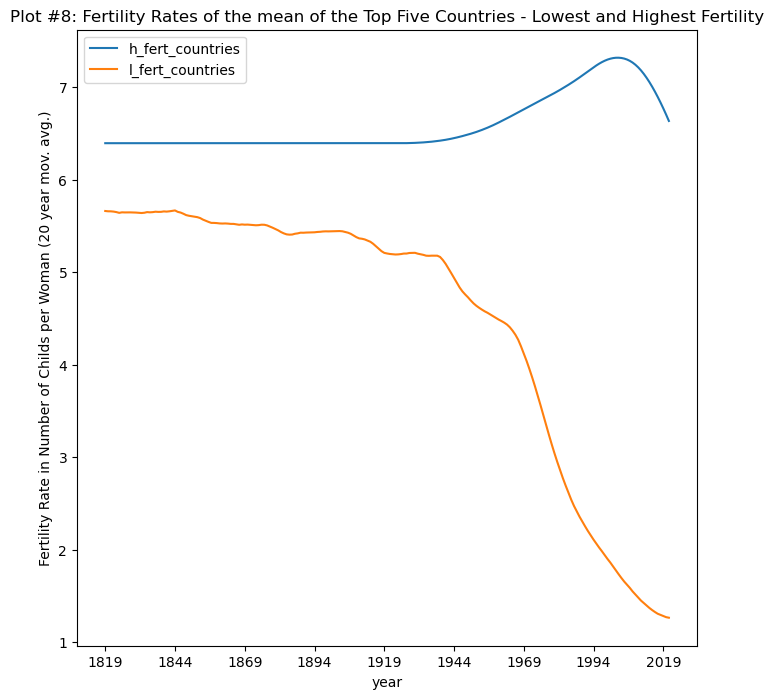

In [75]:
# Plotting 
print(df_fert_20_year_mean.describe())
df_fert_20_year_mean.plot(legend= True, figsize = (8,8), \
                                title='Plot #'+str(plot)+': Fertility Rates of the mean of the Top Five Countries - Lowest and Highest Fertility', \
                                ylabel = 'Fertility Rate in Number of Childs per Woman (20 year mov. avg.)', xlabel = 'year',);
plot+=1  

#### Comparing the trends in income and fertlity for the low and high fertility countries

In order to analyse the trends in income and fertility for the low and high fertility countries we compute the correlation betweetn income and fertility.

In [76]:
df_fert_20_year_mean.corrwith(df_income_20_year_mean)

h_fert_countries    0.780953
l_fert_countries   -0.935392
dtype: float64

There is a high positive correlation between income and fertility for the high fertility countries. For the low fertility countries we see a strong negative correlation. 

<a id='conclusion'></a>
# Conclusions

We found that the countries with the highest fertility rate as of 2021 (childs per woman) are Niger, Somilia, Congo, Mali and Chad.

The countries with the lowest fertility rates are Moldova, Portugal, Taiwan, Singapore and Poland. 

Whereas the fertility rate in the high fertility countries only slightly decreased from the year 1800 to 2021, and in one case even increased, we seee a strong decrease in the fertility rate for the low fertility countries, with a decrease up to 80 %.

We observed that the difference between the high and low fertility countries increased over time.

We can observe different trend for the fertility rate over time. In all high fertility countries, the rate was first constant until around 1950 (probably due to a lack of consistent data). Then the rate increased until around the year 2000. From the year 2000 we saw a decrease. 

For the low fertility countries we do not see uniform trends. In Taiwan and Singapore we see trends similar to the high fertility countries, but we a steeper and earlier decline in the rate. For all other low fertility countries we see a steady decline over the years. 

We can observe that income and fertility is highly negatively correlated for the low fertlity countries. An increase in income is observed to be in line with a decrease in fertility. 

On the other hand, we see that income and fertility is highly positively correlated for the high fertility countries. An increase in income sees an increase in fertility. 

 

# Limitations

Nonetheless, one should keep in mind, that this is only an observed correlation, which does not necessarily mean that there is a causation between those two factors. There might be underlying factors such as the share of women entering the job market, which contributes to higher overall income but probably lowers the fertility rate. We need further analysis to investigate this relationship further.

Futhermore there are some restricitions by the given data: 
1. Fertility rate in historical data measurement vs. estimation: The fertility rate for historical data before 1900 for most countries is based on estimations on the overall population growth. Modern data is based on the actual measurement of births per woman, because today this data is collected by government institutions. There might be inaccuracies when comparing both types of data.  
2. Historical Income data highly depending on estimations: The same problem concerning the historical data is true for income data. Actual measured income data is in most countries only collected in modern times. All historical data is subject to inaccuracies due to estimations based on assumptions. 
